In [1]:
# Titanic_Dataset_Analysis

In [2]:
# https://www.kaggle.com/code/meeraajayakumar/titanic-dataset-analysis/input?select=train.csv

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
train=pd.read_csv("Titanic_train.csv")
test=pd.read_csv("Titanic_test.csv")
submit = pd.read_csv("Titanic_gender_submission.csv")
df = pd.concat([train, test], sort=False)

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.shape

(1309, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
#checking the null values
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
# We can see that there are so many missing values in 'survived','Age','Cabin' 
#so we are replacing the missing values with mean or median or mode

In [13]:
df['Survived']=df['Survived'].fillna(df['Survived'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,C23 C25 C27,S
414,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S
416,1308,0.0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,C23 C25 C27,S


In [14]:
#checking for missing values again
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

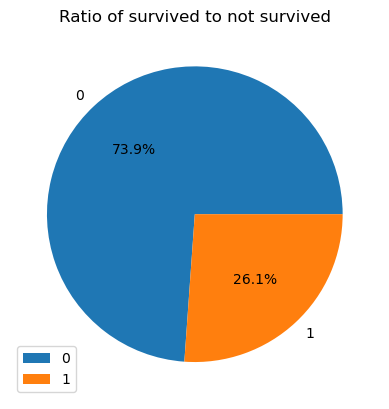

In [16]:
# Exploratory Data Analysis

#checking the ratio of people survived to not survived
y=df['Survived'].value_counts()
labels=['0','1']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Ratio of survived to not survived')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

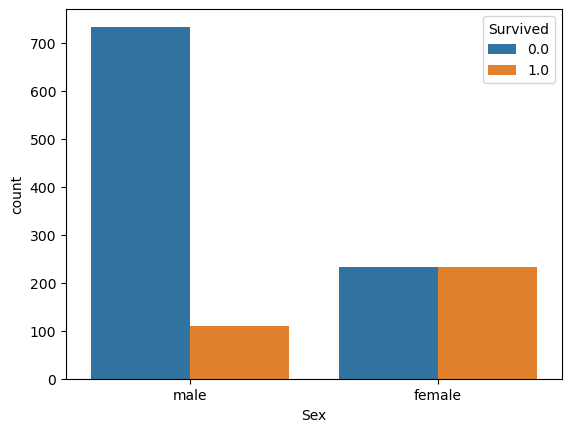

In [17]:
#checking gender that survived 
sns.countplot(x='Sex',data=df,hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

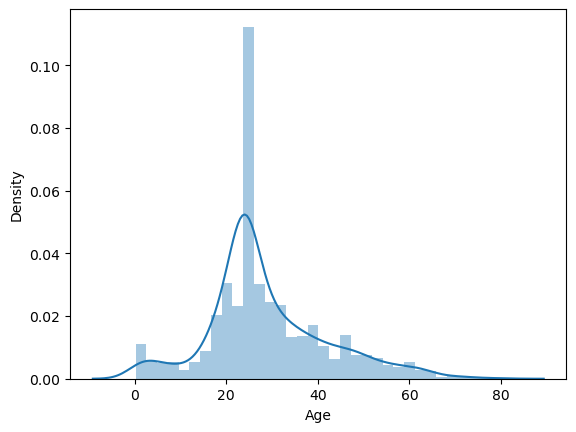

In [18]:
#checking the distribution of age
sns.distplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

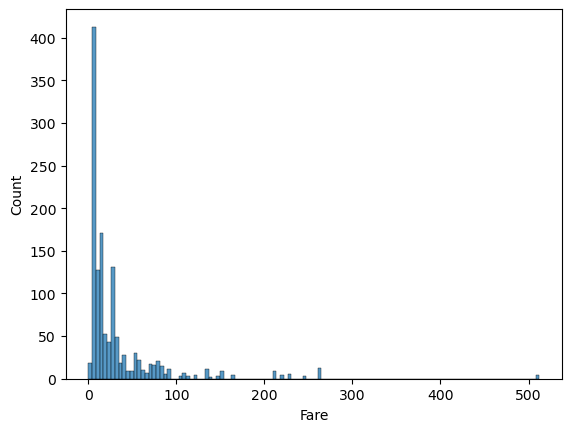

In [19]:
#checking the Fares
sns.histplot(data=df, x='Fare')

<Axes: >

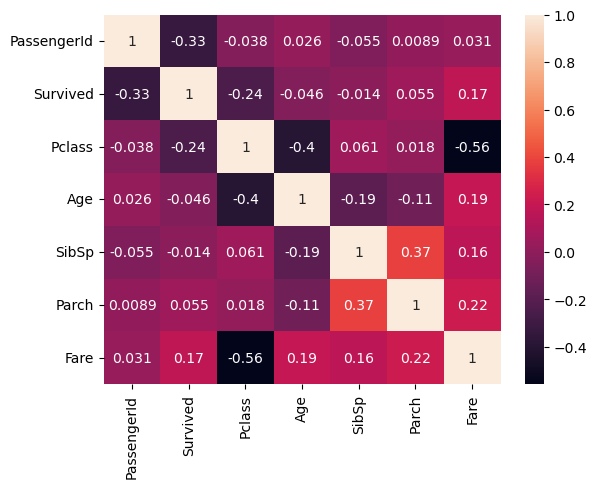

In [20]:
#checking the correlation
sns.heatmap(df.corr(),annot=True)

In [21]:
#Label encoding
le=LabelEncoder()
lst=['Sex','Ticket','Cabin','Embarked']
for i in lst:
    df[i]=le.fit_transform(df[i])

In [25]:
# The fit_transform() method is used to fit the data into a model and transform
# it into a form that is more suitable for the model in a single step.

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,720,7.2500,80,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,816,71.2833,106,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,914,7.9250,80,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,65,53.1000,70,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,649,8.0500,80,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,"Spector, Mr. Woolf",1,24.0,0,0,711,8.0500,80,2
414,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,834,108.9000,64,0
415,1307,0.0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,872,7.2500,80,2
416,1308,0.0,3,"Ware, Mr. Frederick",1,24.0,0,0,579,8.0500,80,2


In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df.shape

(1309, 12)

In [29]:
#removing unwanted variables
df.drop(['Name'],axis=1,inplace=True)

In [30]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,720,7.2500,80,2
1,2,1.0,1,0,38.0,1,0,816,71.2833,106,0
2,3,1.0,3,0,26.0,0,0,914,7.9250,80,2
3,4,1.0,1,0,35.0,1,0,65,53.1000,70,2
4,5,0.0,3,1,35.0,0,0,649,8.0500,80,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,1,24.0,0,0,711,8.0500,80,2
414,1306,0.0,1,0,39.0,0,0,834,108.9000,64,0
415,1307,0.0,3,1,38.5,0,0,872,7.2500,80,2
416,1308,0.0,3,1,24.0,0,0,579,8.0500,80,2


In [31]:
#splitting the dataset
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [32]:
#Performing Scaling
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.41510576e-02, 4.32432432e-01, 1.00000000e+00],
       [7.64525994e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.39135735e-01, 5.72972973e-01, 0.00000000e+00],
       [1.52905199e-03, 1.00000000e+00, 0.00000000e+00, ...,
        1.54685698e-02, 4.32432432e-01, 1.00000000e+00],
       ...,
       [9.98470948e-01, 1.00000000e+00, 1.00000000e+00, ...,
        1.41510576e-02, 4.32432432e-01, 1.00000000e+00],
       [9.99235474e-01, 1.00000000e+00, 1.00000000e+00, ...,
        1.57125536e-02, 4.32432432e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.36404952e-02, 4.32432432e-01, 0.00000000e+00]])

In [33]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=101)

In [34]:
# K Nearest Neighbors

#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       189
         1.0       0.83      0.53      0.65        73

    accuracy                           0.84       262
   macro avg       0.84      0.75      0.77       262
weighted avg       0.84      0.84      0.83       262



In [35]:
#SVM
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       189
         1.0       0.93      0.53      0.68        73

    accuracy                           0.86       262
   macro avg       0.89      0.76      0.79       262
weighted avg       0.87      0.86      0.85       262



In [36]:
#Gaussian NB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       189
         1.0       0.70      0.58      0.63        73

    accuracy                           0.81       262
   macro avg       0.77      0.74      0.75       262
weighted avg       0.81      0.81      0.81       262



In [37]:
#Decision tree
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       189
         1.0       0.71      0.63      0.67        73

    accuracy                           0.82       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.82      0.82      0.82       262



In [39]:
# Decision Tree Hypertuning

parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [40]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [41]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=4,min_samples_split=2)
dt1.fit(X_train,y_train)
y_predd=dt1.predict(X_test)
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       189
         1.0       0.86      0.68      0.76        73

    accuracy                           0.88       262
   macro avg       0.87      0.82      0.84       262
weighted avg       0.88      0.88      0.88       262



In [43]:
# Random forest
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       189
         1.0       0.88      0.68      0.77        73

    accuracy                           0.89       262
   macro avg       0.88      0.82      0.85       262
weighted avg       0.88      0.89      0.88       262



In [44]:
# RandomForest Hypertuning

parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [45]:
print(clf.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
rf1=RandomForestClassifier(n_estimators=300,min_samples_leaf=1,min_samples_split=2,max_depth=None)
rf1.fit(X_train,y_train)
y_predr=rf1.predict(X_test)
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       189
         1.0       0.88      0.68      0.77        73

    accuracy                           0.89       262
   macro avg       0.88      0.82      0.85       262
weighted avg       0.88      0.89      0.88       262



In [47]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       189
         1.0       0.85      0.75      0.80        73

    accuracy                           0.89       262
   macro avg       0.88      0.85      0.86       262
weighted avg       0.89      0.89      0.89       262



In [51]:
# AdaBoost Hypertuning

parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0]}
clf=GridSearchCV(ad,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [52]:
print(clf.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


In [53]:
ad1=AdaBoostClassifier(learning_rate=0.5,n_estimators=200)
ad1.fit(X_train,y_train)
y_preda=ad1.predict(X_test)
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       189
         1.0       0.80      0.73      0.76        73

    accuracy                           0.87       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.87      0.87      0.87       262



In [54]:
#gradient boost
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       189
         1.0       0.87      0.64      0.74        73

    accuracy                           0.87       262
   macro avg       0.87      0.80      0.83       262
weighted avg       0.87      0.87      0.87       262



In [55]:
# Gradient Boosting Hypertuning

parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [56]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [57]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=50)
gb1.fit(X_train,y_train)
y_predg=gb1.predict(X_test)
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       189
         1.0       0.90      0.64      0.75        73

    accuracy                           0.88       262
   macro avg       0.89      0.81      0.84       262
weighted avg       0.88      0.88      0.87       262



In [58]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       189
         1.0       0.86      0.66      0.74        73

    accuracy                           0.87       262
   macro avg       0.87      0.81      0.83       262
weighted avg       0.87      0.87      0.87       262



In [59]:
# Xg Boost Hypertuning

parameters = {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.5, 1.0],'n_estimators': [50, 100, 200],'subsample': [0.5, 0.8, 1.0],'colsample_bytree': [0.5, 0.8, 1.0]}
clf=GridSearchCV(xgb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy')

In [60]:
print(clf.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [61]:
xgb1=XGBClassifier(colsample_bytree=0.5,learning_rate=0.1,max_depth=7,n_estimators=100,subsample=1.0)
xgb1.fit(X_train,y_train)
y_predx=xgb1.predict(X_test)
print(classification_report(y_test,y_predx))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       189
         1.0       0.89      0.70      0.78        73

    accuracy                           0.89       262
   macro avg       0.89      0.83      0.86       262
weighted avg       0.89      0.89      0.89       262



In [62]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])
test['Age']=test['Age'].fillna(test['Age'].mode()[0])
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [65]:
lst=['Sex','Ticket','Cabin','Embarked']
for i in lst:
    test[i]=le.fit_transform(test[i])

In [66]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,15,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,15,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,15,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,15,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,21.0,0,0,267,8.0500,15,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,324,108.9000,22,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,346,7.2500,15,2
416,1308,3,"Ware, Mr. Frederick",1,21.0,0,0,220,8.0500,15,2


In [67]:
test.drop(['Name'],axis=1,inplace=True)
pred = rf1.predict(test)

In [68]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })
submission.to_csv('submission.csv', index=False)

In [69]:
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0
